In [1]:
#Load the numpy and scipy libraries
import numpy as np
from scipy.spatial import Delaunay

In [2]:
N = 10

np.random.seed(1)
points = np.random.randn(N, 2)
velocities = np.random.randn(N, 2)
m = np.ones(N)

Step 1

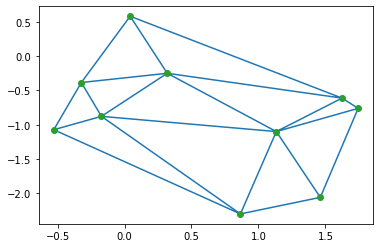

In [3]:
#The Delaunay tesselation
delaunay = Delaunay(points)

import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], delaunay.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

Step 2

In [4]:
#Area of a triangle
def volume(sim, points):
    return abs(np.linalg.det(np.array([points[sim[1]] - points[sim[0]], 
                                       points[sim[2]] - points[sim[0]]]))) / 2

#The density estimate
rho = np.zeros(N)
for sim in delaunay.simplices:
    vol = volume(sim, points)
    for index in sim:
        rho[index] += vol
rho = (2 + 1) * m / rho
        
#The gradients
Drho = []
Dv   = []

for sim in delaunay.simplices:
        [p0, p1, p2] = points[sim] 
        [r0, r1, r2] = rho[sim]
        [v0, v1, v2] = velocities[sim]
        
        A = np.array([p1 - p0, p2 - p0])
        Drho.append(np.linalg.inv(A) @ np.array([r1 - r0, r2 - r0]))
        Dv.append(np.linalg.inv(A) @ np.array([v1 - v0, v2 - v0]))

Step 3

In [5]:
def dens(x, rho, Drho, delaunay):
    simplexIndex = delaunay.find_simplex(x)
    pointIndex   = delaunay.simplices[simplexIndex][0]

    return  rho[pointIndex] + Drho[simplexIndex] @ (x - delaunay.points[pointIndex])


def v(x, velocities, Dv, delaunay):
    simplexIndex = delaunay.find_simplex(x)
    pointIndex   = delaunay.simplices[simplexIndex][0]
    
    return  velocities[pointIndex] + Dv[simplexIndex] @ (x - delaunay.points[pointIndex])

def theta(x, velocities, Dv, delaunay):
    simplexIndex = delaunay.find_simplex(x)
    pointIndex   = delaunay.simplices[simplexIndex][0]
    
    return  np.trace(Dv[simplexIndex])

def omega(x, velocities, Dv, delaunay):
    simplexIndex = delaunay.find_simplex(x)
    pointIndex   = delaunay.simplices[simplexIndex][0]
    
    return Dv[simplexIndex][1,0] - Dv[simplexIndex][0,1]

In [6]:
print(dens([0.5, -0.5], rho, Drho, delaunay))
print(v([0.5, -0.5], velocities, Dv, delaunay))
print(theta([0.5, -0.5], velocities, Dv, delaunay))
print(omega([0.5, -0.5], velocities, Dv, delaunay))

1.5395178773343392
[-0.81465587  1.08447809]
1.0504078562810353
1.053561083212419
